# Interpolate data on 2D mesh by region

Interpolation of z=f(x,y) data on 2D mesh by regions using interpolation functions of pretel (scipy).

In [1]:
import shutil
import numpy as np
from os import environ, path, remove
import matplotlib.pyplot as plt
import matplotlib.path as pltp
from data_manip.extraction.telemac_file import TelemacFile
from pretel.interpolator import Interp2D, Interp2DChunk
from postel.plot2d import plot2d_triangle_mesh, plot2d_scalar_map

## Interpolate data using 2D interpolators of pretel (scipy)

Initial geometry file without bathy data:

In [2]:
ori_file = path.join(environ['HOMETEL'],'notebooks','data','geo_malpasset-small.slf')

New geometry file containing the interpolated bathy data:

In [3]:
res_file = path.join(environ['HOMETEL'],'notebooks','data','geo_malpasset-small_with_bathy.slf')

# we make a copy of the original file without bathymetry data in it
print(f'{ori_file} -> {res_file}')
shutil.copy2(ori_file, res_file)

res = TelemacFile(res_file, access='rw')

/home/d60881/telemac-mascaret/notebooks/data/geo_malpasset-small.slf -> /home/d60881/telemac-mascaret/notebooks/data/geo_malpasset-small_with_bathy.slf


Bathymetry data to interpolate on mesh:

In [4]:
bathy_file = path.join(environ['HOMETEL'],'notebooks','data','bathy_malpasset.xyz')
xyz = np.loadtxt(bathy_file, delimiter=" ")

Define regions:

In [5]:
region1 = np.array([
    [336.5, 4787.],
    [5561.5, 1386.65],
    [7987.5, 6259.2],
    [377.9, 6383.6],
    [336.5, 4787.]])

region2 = np.array([
    [7987.5, 6259.2],
    [5561.5, 1386.65],
    [10040.1, -2324.8],
    [11553.7, 6964.2],
    [7987.5, 6259.2]])

region3 = np.array([
    [11553.7, 6964.2],
    [10040.1, -2324.8],
    [17981.4, -2250.9],
    [18002.1, 6901.97],
    [11553.7, 6964.2]])

regions = [region1, region2, region3]

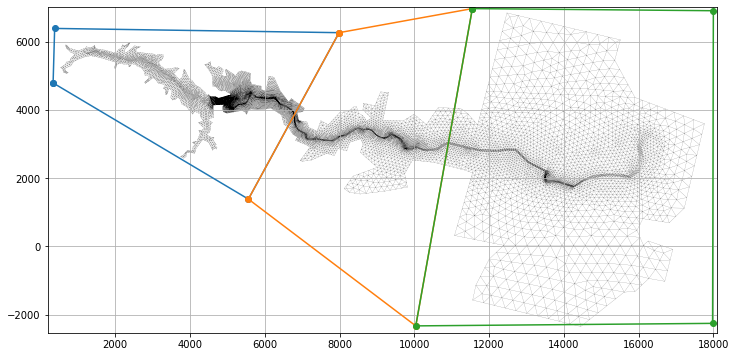

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
plot2d_triangle_mesh(ax, res.tri)
ax.plot(region1[:, 0], region1[:, 1], 'o-')
ax.plot(region2[:, 0], region2[:, 1], 'o-')
ax.plot(region3[:, 0], region3[:, 1], 'o-')
ax.grid()
plt.show()

Define interpolators:

In [7]:
# interp1 = Interp2D(xyz, kind="nearest")
# interp2 = Interp2D(xyz, kind="linear", fill_value=0.)
# interp3 = Interp2D(xyz, kind="cubic", fill_value=0.)

# interpolators = [interp1, interp2, interp3]

### Interpolate in region 1

In [8]:
res = TelemacFile(res_file, access='rw')

interp_data = res.interpolate_xyz_on_mesh(
    xyz, 
    kind='linear',
    poly=region1,
    init=res.get_data_value('BOTTOM', 0),
    fill_value=0.)

res.set_data_value('BOTTOM', 0, interp_data)

res.close()

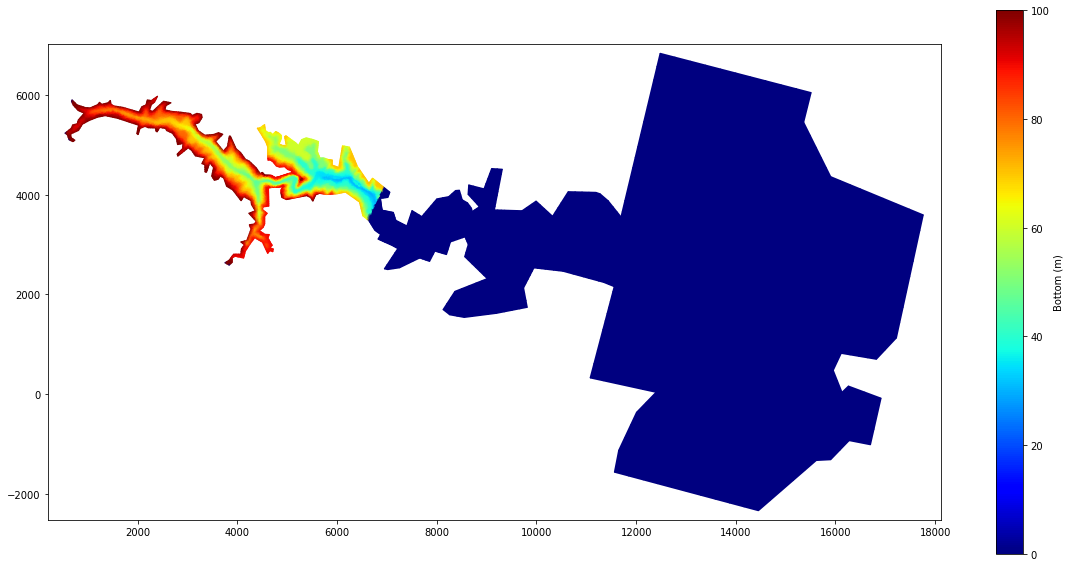

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_aspect('equal')

res = TelemacFile(res_file)
bottom = res.get_data_value('BOTTOM', 0)
plot2d_scalar_map(fig, ax, res.tri, bottom, data_name='Bottom (m)')

plt.show()
plt.close(fig)
res.close()

### Set constant value in region 2

In [10]:
res = TelemacFile(res_file, access='rw')

res.set_data_on_polygon(
    'BOTTOM',
    0,
    42.,
    region2,
    loc='inside')

res.close()

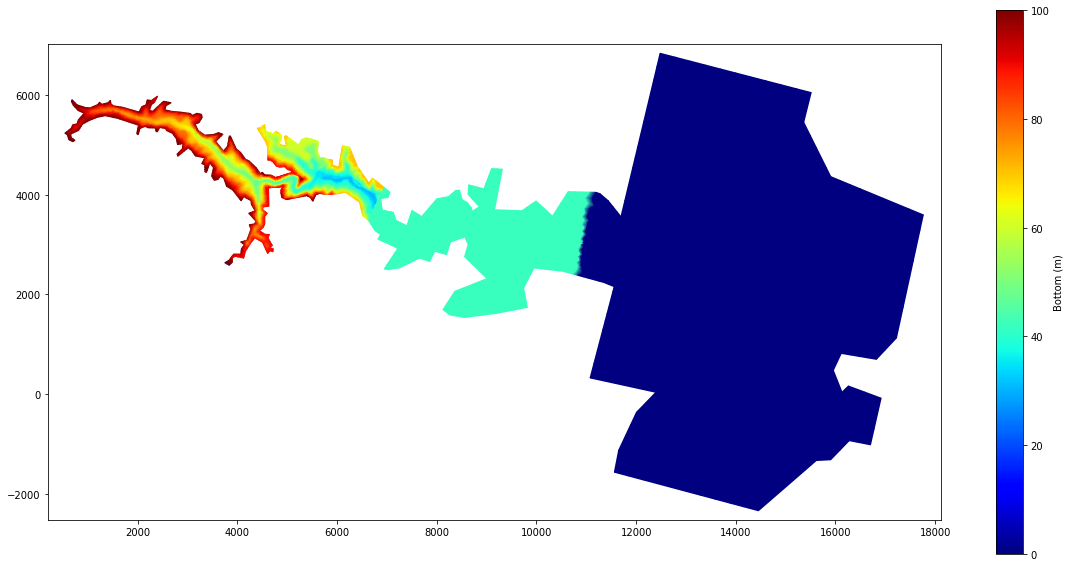

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_aspect('equal')

res = TelemacFile(res_file)
bottom = res.get_data_value('BOTTOM', 0)
plot2d_scalar_map(fig, ax, res.tri, bottom, data_name='Bottom (m)')

plt.show()
plt.close(fig)
res.close()

### Set value in region 3 defined by a function

In [12]:
def func(x, y):
    return 0.0032*x + 0.0012*y

res = TelemacFile(res_file, access='rw')

res.set_data_on_polygon(
    'BOTTOM',
    0,
    func,
    region3,
    loc='inside',
    epsilon=200)

res.close()

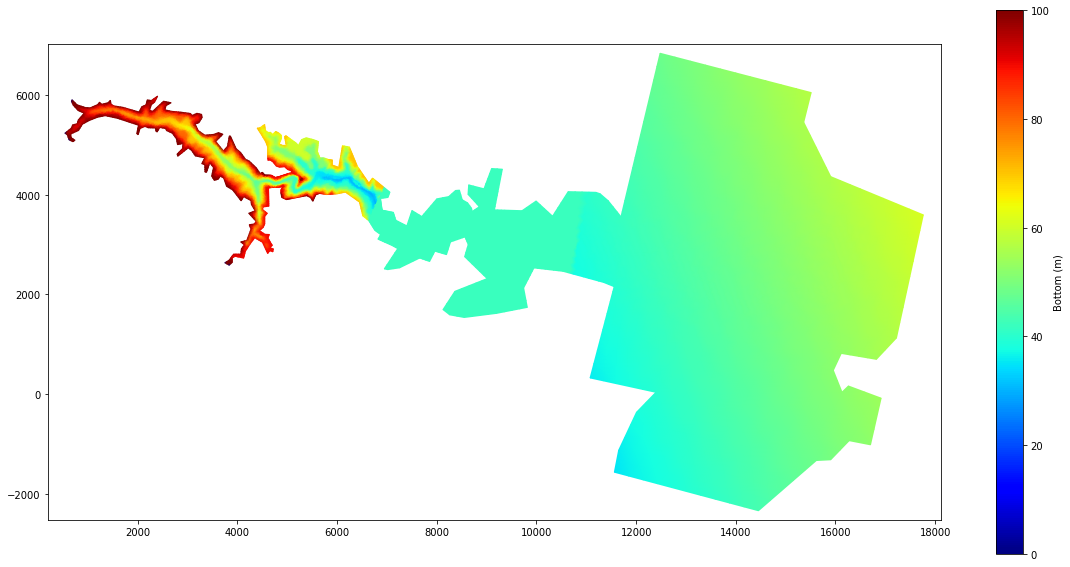

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_aspect('equal')

res = TelemacFile(res_file)
bottom = res.get_data_value('BOTTOM', 0)
plot2d_scalar_map(fig, ax, res.tri, bottom, data_name='Bottom (m)')

plt.show()
plt.close(fig)
res.close()